# This the task for GEN-AI from Vincent's Granvilles book "Synthetic Data and Generative AI"

The first thing is to import the packages

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy
from scipy.stats import ks_2samp
from statsmodels.distributions.empirical_distribution import ECDF






Reading the data from Github from the Vincent Granville's [repo](https://github.com/VincentGranville/Main) 

The link for the project book is [here](https://github.com/VincentGranville/Large-Language-Models/blob/main/Projects4.pdf)

In [60]:
# Selecting the needed data frames according to the project book. 
insurance = 'insurance.csv'
insurance_compare = 'insurance_compare.csv'

# Getting the URL
url = "https://raw.githubusercontent.com/VincentGranville/Main/main/"
url2 = "https://github.com/jsaraviadrago/genai_synthethic/blob/main/"

# Separating the raw data frames
raw_insurance =  url + insurance 
raw_insurance_compare = url + insurance_compare 
raw_insurance_compare_update = url2 + insurance_compare

# Opening the links with pandas.
df_insurance = pd.read_csv(raw_insurance)
df_insurance_compare = pd.read_csv(raw_insurance_compare)
df_insurance_compare_update = pd.read_csv(raw_insurance_compare_update)


### Step 1: Making the histograms for the numerical variables 

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(df_insurance['age'])
axs[0, 0].set_title("Age")
axs[1, 0].hist(df_insurance['charges'])
axs[1, 0].set_title("Charges")
axs[0, 1].hist(df_insurance['bmi'])
axs[0, 1].set_title("Bmi")
fig.tight_layout()




## Step 2: perform evaluations of vendor comparisons

Preparing the data to make some analysis. 
- Drop columns
- Erase NA values

In [62]:
# Watch out with this code, since I am overwriting the dataset you need to run first the second cell or an error will be thrown. This can be fixed if you use a script. 

df_insurance_compare = df_insurance_compare.drop('region', axis=1) # drop columns that are not useful
df_insurance_compare = df_insurance_compare.dropna(axis='columns') # Drop na row wise. 

# Create a dataset of insurance compare with only Real category
df_insurance_compare_real = df_insurance_compare.loc[df_insurance_compare['Data'] == 'Real'] 

df_insurance_compare_real = df_insurance_compare_real.drop('Data', axis=1) # drop all the NA values from Data column
df_insurance_compare_real = df_insurance_compare_real.to_numpy() # this transforms the code into a matrix in order to run the next line of code.



## Step 2.1: run the analysis after preparing the data

What did I do here? 
- Correlation matrix
- Drop the real category from the original data frame called ```df_insurance_compare```

In [63]:
# Making a correlation matrix with coefficients
r_corr = np.corrcoef(df_insurance_compare_real.T) # Here you need to transpose the data so it makes sense

#r_corr # this code prints the correlation matrix. Note if I use print it also works the only differences is that it outputs in pure python form

ltests = df_insurance_compare.Data.unique().tolist() # Here it just shows all the unique categories of the Data variable
popped_item = ltests.pop(0)   # remove real data from the tests
#print(ltests) # it just prints that the ltests object does not have the "Real" category



## Step 2.2: run the analysis to check for the data

- Calculate the distance of the correlation matrix
- Calculate the distance of the Kolmogorov-Smirnov 

In [64]:
for test in ltests:

    data_test = df_insurance_compare.loc[df_insurance_compare['Data'] == test] # select the category test
    data_test = data_test.drop('Data', axis=1) # Drop the column Data from the test_data
    data_test = data_test.to_numpy() # change the data frame into a matrix
    t_corr = np.corrcoef(data_test.T) # Run a correlation matrix
    delta = np.abs(t_corr - r_corr) # calculating the delta or difference between the correlation matrices of both test sets. The nearest to 0 the best match. 
    dim = delta.shape[0]   # number of features
  
    ks = np.zeros(dim) # Here I want to calculate the Kolmogorov-Smirnov distance remember that the lower the distance the better. Lower distance means more similarity. 
    out_of_range = 0
    for idx in range(dim): # This for loop just loops throw all the m columns 
        dr = df_insurance_compare_real[:,idx]
        dt = data_test[:,idx]
        stats = ks_2samp(dr, dt)
        ks[idx] = stats.statistic # Calculate the Kolmogorov-Smirnov distance throw all the columns
        if np.min(dt) < np.min(dr) or np.max(dt) > np.max(dr):
            out_of_range = 1
    str = "%20s %14s %8.6f %8.6f %8.6f %8.6f %1d" % (insurance_compare, test, np.mean(delta), 
              np.max(delta), np.mean(ks), np.max(ks), out_of_range)
    print(str)
    


insurance_compare.csv         YData1 0.015844 0.051774 0.020227 0.030059 0
insurance_compare.csv         YData2 0.017100 0.052157 0.022297 0.028401 0
insurance_compare.csv         Gretel 0.021085 0.092606 0.040011 0.086254 0
insurance_compare.csv            SDV 0.033703 0.350682 0.093176 0.213358 0
insurance_compare.csv  Synthesize.io 0.025702 0.070506 0.025870 0.040396 0
insurance_compare.csv      VG_Copula 0.013471 0.049100 0.016442 0.032885 0
insurance_compare.csv      Mostly.ai 0.017264 0.057882 0.023169 0.041854 0


### Step 2.3: create the scatterplot

Creating a function for the scatterplot



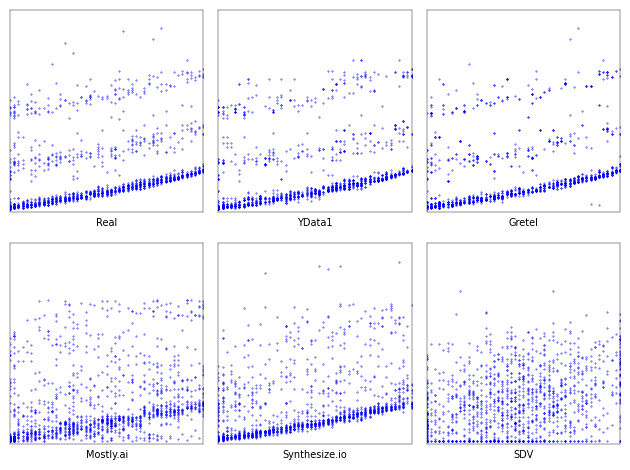

In [71]:
def vg_scatter(df_insurance_compare, test, counter):

    # customized plots, insurance data 
    # one of 6 plots, subplot position based on counter

    data_plot = df_insurance_compare.loc[df_insurance_compare['Data'] == test]
    x = data_plot[['age']].to_numpy()
    y = data_plot[['charges']].to_numpy()
    plt.subplot(2, 3, counter)
    plt.scatter(x, y, s = 0.1, c ="blue")
    plt.xlabel(test, fontsize = 7)
    plt.xticks([])
    plt.yticks([])
    plt.ylim(0,70000)
    plt.xlim(18,64)
    return()

# Set the linewidth for axes
mpl.rcParams['axes.linewidth'] = 0.3

# Plot each scatter plot
vg_scatter(df_insurance_compare, 'Real', 1)
vg_scatter(df_insurance_compare, 'YData1', 2)
vg_scatter(df_insurance_compare, 'Gretel', 3)
vg_scatter(df_insurance_compare, 'Mostly.ai', 4)
vg_scatter(df_insurance_compare, 'Synthesize.io', 5)
vg_scatter(df_insurance_compare, 'SDV', 6)

plt.tight_layout() # Just to fit it in a nice size. 
plt.show()



### Step 2.4: Create the histogram

Creating a function for the histogram and plotting the histogram




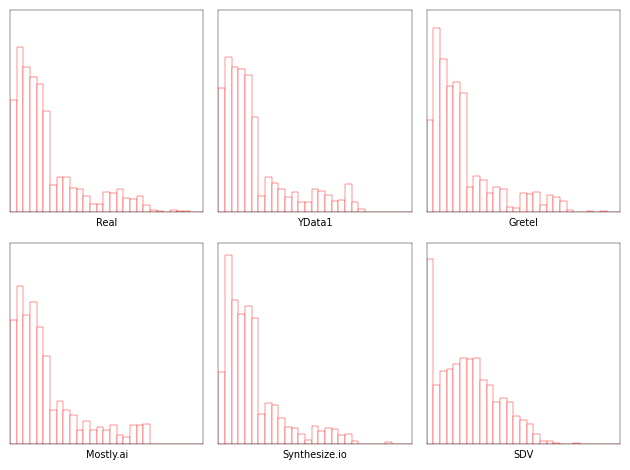

In [72]:
def vg_histo(df, test, counter):

    # customized plots, insurance data 
    # one of 6 plots, subplot position based on counter

    data_plot = df_insurance_compare.loc[df['Data'] == test]
    y = data_plot[['charges']].to_numpy()
    plt.subplot(2, 3, counter)
    binBoundaries = np.linspace(0, 70000, 30)
    plt.hist(y, bins=binBoundaries, color='white', align='mid',edgecolor='red',
              linewidth = 0.3) 
    plt.xlabel(test, fontsize = 7)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(0,70000)
    plt.ylim(0, 250)
    return()

# Set the linewidth for axes
mpl.rcParams['axes.linewidth'] = 0.3

vg_histo(df_insurance_compare, 'Real', 1)
vg_histo(df_insurance_compare, 'YData1', 2)
vg_histo(df_insurance_compare, 'Gretel', 3)
vg_histo(df_insurance_compare, 'Mostly.ai', 4)
vg_histo(df_insurance_compare, 'Synthesize.io', 5)
vg_histo(df_insurance_compare, 'SDV', 6)

plt.tight_layout() # Just to fit it in a nice size. 
plt.show()